# Bloch Theory of Solids

The aim of this theory is to qualitatively understand the behaviour of electrons in a solid. For simplicity, it assumes that the solid is one dimensional i.e. a series of atoms stacked on the x-axis. For the record, I know this is not the reality. I'm stating this mainly to quell the inner voice which is vehemently refusing to go along with this model. But even though this model, which in no way, represents real solids, qualitatively resembles the behaviour of semiconductors. Semiconductors are very much present in nature and power this laptop on which I'm writing. So who am I to argue with nature. If nature wants to go along with this charade, then so should I.

The model assumes the so called **Dirac Comb Potential**. The atomic nuclei, present at equidistant intervals, exerts an attractive force on the electrons. It ignores electron-electron interactions altogether.

$V = -\alpha \sum_j \delta(x - ja)$

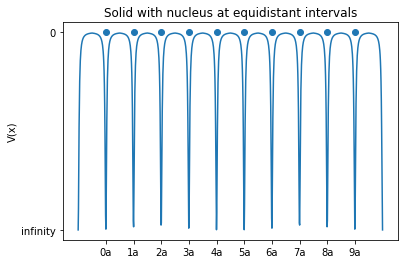

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import *
from sympy.plotting import plot
init_printing()

def comb(i) : 
    return -1 / ((i - round(i)) ** 2 + 1e-3)

plt.scatter(range(10), [0]*10)
plt.plot(np.linspace(-1, 10, 1000), [comb(i) for i in np.linspace(-1, 10, 1000)])
plt.xticks(range(10), [f'{i}a' for i in range(10)])
plt.yticks([0, -1000], ['0', 'infinity'])
plt.title('Solid with nucleus at equidistant intervals')
plt.ylabel('V(x)')
plt.show()

## Solving the Schrodinger Equation

As always, the Time-Dependent Schrodinger Equation will be solved by first solving the Time-Independent Schrodinger Equation and then stacking the time phase factor. The Time-Independent Schrodinger Equation can be solved by seperation of variables. That is, assume that: 

$\psi(\mathbf{r_1}, \cdots, \mathbf{r_N}) = \prod_{i=1}^{N}\psi_i(\mathbf{r_i})$

For each $\psi_i$, the Time-Independent Schrodinger Equation can be solved independently. I'll find the energy quantization for the $i^{th}$ electron in the $N$ electron system. Since the Hamiltonian is identical for all electrons, the same quantization will apply to all of them.

Before I go on and do this, I'll discuss how to put together the stationary states for the entire system of $N$ identical electrons from individual eigenfunctions $\psi_i$. 

### Identical particles

People who developed this theory stated that systems of identical electrons need to follow an additional postulate. This postulate came to be known as Pauli's Exclusion Principle. According to this principle, the one particle eigenfunctions that are used to construct the system eigenfunction have to be distinct.

### Bloch's Theorem

For periodic potentials, Bloch showed that the solution, $\psi$ satisfies: 

$\psi(x + a) = e^{iKa}\psi(x)$

For $K$ being a constant, determined through the boundary conditions. In this model, we can apply a simple but stupid and wrong boundary condition:

$\psi(x + Na) = \psi(x)$

Since, in a solid, $N$ will be large, on the order of the Avogadro Number ($\sim 10^23$), it's believable that the $\psi$ would repeat itself. This boundary condition gives us: 

$e^{iKNa} = 1 \implies KNa = 2\pi n$ for $n \in \mathbb{Z}$

$\implies K = \frac{2\pi n}{Na}$ for $n \in \mathbb{Z}$

Due to Bloch's theorem, we only need to solve the Time-Independent Schrodinger Equation in one interval and the rest will follow.

$\frac{-\hbar^2}{2m}\frac{d^2\psi}{dx^2} = E\psi$ for $x \in (0, 1)$

### Case 1 (E > 0 or Scattering States)

The general solution for $\psi$ is $Asin(kx) + Bcos(kx)$, where $k = \frac{\sqrt{2mE}}{\hbar}$. To determine the boundary conditions, we will apply boundary conditions at $x = 0$. 

1. Continuity of $\psi$ at $x = 0$.
2. Discontinuity of $\frac{d\psi}{dx}$ at $x = 0$.

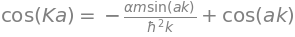

In [2]:
var('x k A B K a hbar m alpha')

RHS = A * sin(k * x) + B * cos(k * x) # psi from the right of origin
LHS = E ** (-I * K * a) * RHS.subs(x, x + a) # psi from the left of origin, given by Bloch's Thm

C = -hbar ** 2 / (2 * m)
psi0 = RHS.subs(x, 0)

# Condition 1:
eq1 = Eq(RHS.subs(x, 0), LHS.subs(x, 0))

diffRHS = diff(RHS, x).subs(x, 0)
diffLHS = diff(LHS, x).subs(x, 0)

# Condition 2:
diffDiscontinuity = C * (diffRHS - diffLHS) - alpha * psi0
eq2 = Eq(diffDiscontinuity, 0)

# Using condition 1 and condition 2, I'll get a relation between K and k
# k contains the Hamiltonian Eigenvalue E and K contains the discrete n.
A_ = solve(eq1, A)[0]
fk = solve(simplify(diffDiscontinuity.subs(A, A_).rewrite(sin)), cos(K * a))[0]
gK = cos(K * a)
Eq(gK, fk)

I'll plot the function on the right hand side. I have chosen reasonable values for all parameters and manually tuned the parameter alpha so that the plot looks good. The left hand side is always in the range $[-1, 1]$. We can assume that for any value in this range, one can find a suitable $K$ since $K = \frac{2\pi n}{Na}$ and $N$ is large.

We see that only certain $k$ intervals are allowed. Consequently, only certain intervals of energy eigenvalues are allowed. These intervals are known as bands. The space between consecutive allowed intervals are known as gaps.

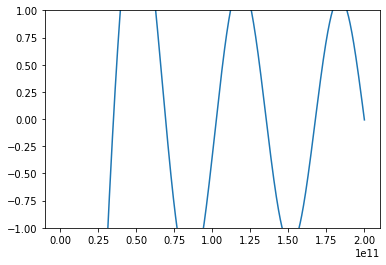

In [3]:
# Let alpha = 1e-27, m = 9.1e-31, a = 1e-10, hbar = 1e-34
fk_ = lambdify(k, fk.subs([(alpha, 1e-27), (m, 9.1e-31), (a, 1e-10), (hbar, 1e-34)]))
x = np.linspace(1, 2e11, 1000)
plt.plot(x, fk_(x))
plt.ylim((-1, 1))
plt.show()

### Case 2 (E < 0 or Bound States)

The general solution for $\psi$ is $Ae^{kx} + Be^{-kx}$ where $k = \frac{\sqrt{-2mE}}{\hbar}$. $k$ is again a positive real number.

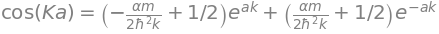

In [4]:
var('x k K a hbar m alpha', real=True)
var('A B')

RHS = A * E ** (k * x) + B * E ** (- k * x) # psi from the right of origin
LHS = E ** (-I * K * a) * RHS.subs(x, x + a) # psi from the left of origin, given by Bloch's Thm

C = -hbar ** 2 / (2 * m)
psi0 = RHS.subs(x, 0)

# Condition 1:
eq1 = Eq(RHS.subs(x, 0), LHS.subs(x, 0))

diffRHS = diff(RHS, x).subs(x, 0)
diffLHS = diff(LHS, x).subs(x, 0)

# Condition 2:
diffDiscontinuity = C * (diffRHS - diffLHS) - alpha * psi0
eq2 = Eq(diffDiscontinuity, 0)

# Using condition 1 and condition 2, I'll get a relation between K and k
# k contains the Hamiltonian Eigenvalue E and K contains the discrete n.
A_ = solve(eq1, A)[0]
step1 = simplify(diffDiscontinuity.subs(A, A_))
 # Gather the only term that can be 0.
step2 = step1.args[-2]
# Expand all e^(a + b) terms into e^a * e^b
step3 = step2.func(*[expand(arg) for arg in step2.args]) 
# The above expression looks like a polynomial in e^(iKa).
step4 = collect(step3, E ** (I * K * a)) / E ** (I * K * a)
finalExpr = expand(expand(step4).rewrite(sin))
fk = collect(expand(solve(finalExpr, cos(K * a))[0]), E ** (a * k))
gK = cos(K * a)
Eq(gK, fk)

Again, I'll plot the right hand side.

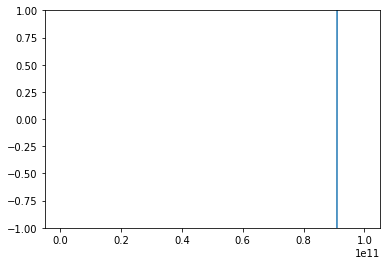

In [5]:
# Let alpha = 1e-27, m = 9.1e-31, a = 1e-10, hbar = 1e-34
fk_ = lambdify(k, fk.subs([(alpha, 1e-27), (m, 9.1e-31), (a, 1e-10), (hbar, 1e-34)]))
x = np.linspace(1, 1e11, 1000)
plt.plot(x, fk_(x))
plt.ylim((-1, 1))
plt.show()

There seem to be very few bound states compared to scattering states. It is difficult to count the number of bound states because that depends highly on the constant $\alpha$ chosen for the potential.

## Food for thought

1. It is nice that we see this band-gap structure arising for solutions of the Time-Independent Schrodinger Equation, but how does that say anything about the electrical conductivity of materials?
2. Pauli's Exclusion Principle, which I have taken as a postulate in the above discussion is, in fact, a consequence of the symmetrization requirement for fermions. How is it a consequence?
3. Shouldn't we be analysing the solutions of the Time-Dependent Schrodinger Equation which will be a time-weighted combination of the Eig

